In [1]:
import matplotlib
from display_results_helper import read_all_real_data_results, read_all_syn_data_results, display_area_vs_y_dim,\
SCALE_BY_BEST_METHOD, VAEDQR, DQR, VQR,NaiveQR, display_mse_vs_r

%load_ext autoreload
%autoreload 2

In [2]:
is_conformalized = True
seeds = 20
tau = 0.1

# Synthetic data

In [7]:
# read_all_syn_data_results(tau,seeds=20, is_conformalized=True, scale_area=False)


read_all_syn_data_results(tau,seeds=20, is_conformalized=True, scale_area=SCALE_BY_BEST_METHOD, 
                         methods=[VAEDQR(3), NaiveQR(), DQR(), VQR()])#datasets=['nonlinear_cond_banana_k_dim_1', 'nonlinear_cond_triple_banana_k_dim_1'])

no results found for parameters: {'dataset_name': 'cond_banana_k_dim_50', 'epoch': 0, 'transformation': 'cond_identity', 'method_name': 'vector', 'is_real': False, 'seed': 0, 'tau': 0.1}

no results found for parameters: {'dataset_name': 'cond_banana_k_dim_100', 'epoch': 0, 'transformation': 'cond_identity', 'method_name': 'vector', 'is_real': False, 'seed': 0, 'tau': 0.1}

no results found for parameters: {'dataset_name': 'nonlinear_cond_triple_banana_k_dim_10', 'epoch': 0, 'transformation': 'cond_identity', 'method_name': 'vector', 'is_real': False, 'seed': 0, 'tau': 0.1}

no results found for parameters: {'dataset_name': 'nonlinear_cond_quad_banana_k_dim_1', 'epoch': 0, 'transformation': 'cond_identity', 'method_name': 'vector', 'is_real': False, 'seed': 0, 'tau': 0.1}

no results found for parameters: {'dataset_name': 'nonlinear_cond_quad_banana_k_dim_10', 'epoch': 0, 'transformation': 'cond_identity', 'method_name': 'vector', 'is_real': False, 'seed': 0, 'tau': 0.1}

Coverage


,d,p,VAE DQR r=3,naive,NPDQR,VQR
Setting,,,,,,
linear,2,1,89.943,90.059,90.041,89.755
linear,2,10,89.926,89.789,90.131,90.065
linear,2,50,89.91,89.99,89.96,-
linear,2,100,89.963,89.993,90.003,-
nonlinear,2,1,90.126,90.078,90.165,90.13
nonlinear,3,1,90.165,90.114,90.021,90.156
nonlinear,3,10,89.991,89.881,90.051,-
nonlinear,4,1,90.031,90.175,89.955,-
nonlinear,4,10,89.792,89.841,89.956,-


Area


,d,p,VAE DQR r=3,naive,NPDQR,VQR
Setting,,,,,,
linear,2,1,1,3.88,3.25,1.476
linear,2,10,1,4.372,4.222,1.264
linear,2,50,1,4.573,3.926,-
linear,2,100,1,3.922,3.406,-
nonlinear,2,1,1,3.369,2.934,2.73
nonlinear,3,1,1,24.611,21.396,8.161
nonlinear,3,10,1,35.21,27.897,-
nonlinear,4,1,1,72.037,217.172,-
nonlinear,4,10,1,183.672,440.817,-


# Area of the quantile region vs the dimension of the response

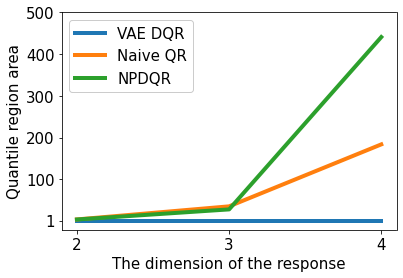

In [3]:
matplotlib.rc('font', **{'size': 15})
display_area_vs_y_dim(tau, seeds=20, is_conformalized=True, y_dims=[2,3,4], p=10, 
                      linear=False, scale_area=SCALE_BY_BEST_METHOD)

# Real data

In [9]:
ALL_DATASETS = ['bio', 'house', 'blog_data', 'meps_19', 'meps_20', 'meps_21']

datasets = ALL_DATASETS
# datasets= ['reduced_'+data for data in ALL_DATASETS]

read_all_real_data_results(tau=0.1,seeds=20, is_conformalized=True, metric_to_display='mean', 
                           datasets=datasets, methods=[VAEDQR(3), NaiveQR(), DQR(), VQR()])

Coverage


,VAE DQR r=3,naive,NPDQR
bio,90.0,90.002,89.892
house,90.157,89.978,89.876
blog_data,90.145,90.064,90.016
meps_19,90.144,89.892,89.865
meps_20,89.997,90.0,89.913
meps_21,89.899,89.879,89.676


Area


,VAE DQR r=3,naive,NPDQR
bio,1,1.223,1.222
house,1,1.168,1.149
blog_data,1,1.551,1.821
meps_19,1,2.215,2.169
meps_20,1,2.27,2.209
meps_21,1,2.191,2.212


## Real data VAE losses

In [11]:
read_all_real_data_results(tau=0.1,seeds=20, is_conformalized=True, metric_to_display='mean', 
                           datasets=['bio', 'house', 'meps_20'], methods=[VAEDQR(r=r) for r in [1,2,3]], result_to_read='vae')

MSE loss


,VAE DQR r=1,VAE DQR r=2,VAE DQR r=3
bio,0.034,0.021,0.021
house,0.036,0.031,0.026
meps_20,0.104,0.025,0.024


KL Loss


,VAE DQR r=1,VAE DQR r=2,VAE DQR r=3
bio,0.02,0.024,0.024
house,0.023,0.024,0.026
meps_20,0.014,0.018,0.018


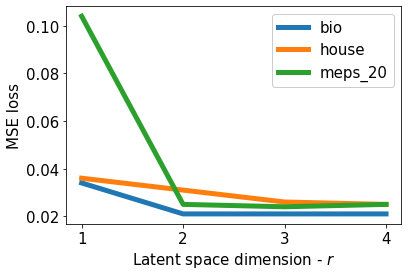

In [25]:
display_mse_vs_r(tau=0.1, seeds=20, is_conformalized=True, metric_to_display='mean',
                     datasets=['bio', 'house', 'meps_20'], r_values=[1, 2, 3, 4])